## Part 2: EDA and Modelling

In [3]:
# import packages
import pandas as pd
import string
import numpy as np
import re
import nltk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [4]:
# read data
full_df = pd.read_csv('../data/full_df_rm_com_wds.csv')

#### CountVectorizer

In [5]:
# to convert dataframe into list for passing into CountVectorizer
full_df_lem = full_df['rm_com_words']
lem_list = [''.join(str(item)) for item in full_df_lem]

In [6]:
# Create an instance of CountVectorizer
# set min_df of 10 to remove common random/mispelt words; set max_df at 10% to remove common words that may not bring value to analysis
# reduced total no. of word tokens from 20382 to 4004
count_vect = CountVectorizer(min_df=10, max_df=0.1)  

# full_df_count stores the vectorized version of the data
full_df_count = count_vect.fit_transform(lem_list) 

# Returns the number of rows and columns of cat_counts
print(full_df_count.shape)

# Returns the unique words across all text messages
print(count_vect.get_feature_names())

(11827, 4004)
['abandon', 'abandoned', 'abdomen', 'ability', 'able', 'abnormal', 'abroad', 'absolute', 'absolutely', 'abuse', 'abused', 'abusive', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accidentally', 'acclimate', 'acclimated', 'according', 'account', 'accustomed', 'acd', 'acid', 'acknowledge', 'acne', 'acre', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activity', 'actual', 'actually', 'adapt', 'adapted', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjusts', 'administered', 'admit', 'admittedly', 'adopt', 'adopted', 'adopting', 'adoption', 'adorable', 'adore', 'adores', 'adult', 'advance', 'advanced', 'advantage', 'adventure', 'adventurous', 'advise', 'advised', 'affect', 'affected', 'affecting', 'affection', 'affectionate', 'afford', 'affordable', 'afraid', 'afternoon', 'afterward', 'afterwards', 'age', 'aged', 'aggression',

c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
full_df_count_df = pd.DataFrame(full_df_count.toarray())
full_df_count_df.columns = count_vect.get_feature_names()
full_df_count_df

,abandon,abandoned,abdomen,ability,able,abnormal,abroad,absolute,absolutely,abuse,...,younger,youngest,youre,youtube,youve,yowl,yowling,zero,zone,zoomies
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### N-grams (Bi- and Tri- grams)

In [8]:
# Create instance of Bi-grams
# set min_df of 10 to remove common random/mispelt word-pairs; set max_df at 0.5% to remove common word-pairs that may not bring value to analysis
# total number of bi-grams at 342519 was reduced to 4101
bigram_vect = CountVectorizer(ngram_range=(2,2), min_df=10, max_df=0.005)
count_bigram = bigram_vect.fit_transform(lem_list)

print(count_bigram.shape)
print(bigram_vect.get_feature_names())

(11827, 4101)
['able bring', 'able eat', 'able find', 'able give', 'able go', 'able help', 'able keep', 'able make', 'able see', 'able take', 'able walk', 'absolutely hate', 'absolutely love', 'accident house', 'across country', 'across room', 'across street', 'act normal', 'acting completely', 'acting fine', 'acting like', 'acting normal', 'acting strange', 'acting way', 'acting weird', 'actually work', 'adopt another', 'adopt one', 'adopt second', 'adopted ago', 'adopted another', 'adopted around', 'adopted female', 'adopted first', 'adopted little', 'adopted local', 'adopted male', 'adopted new', 'adopted one', 'adopted recently', 'adopted rescue', 'adopted second', 'adopted shelter', 'adopted stray', 'adopted sweet', 'adopted two', 'adopted week', 'adult food', 'adult male', 'advance advice', 'advice also', 'advice anyone', 'advice best', 'advice could', 'advice deal', 'advice experience', 'advice first', 'advice get', 'advice getting', 'advice give', 'advice given', 'advice greatl

c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
count_bigram_df = pd.DataFrame(count_bigram.toarray())
count_bigram_df.columns = bigram_vect.get_feature_names()
count_bigram_df

,able bring,able eat,able find,able give,able go,able help,able keep,able make,able see,able take,...,wouldnt let,yeast infection,yes know,yesterday morning,yet still,yo female,yo male,young age,young one,younger one
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
# Create instance of Tri-grams
# set min_df of 10 to remove common random/mispelt word group; set max_df at 0.5% to remove common word group that may not bring value to analysis
# total number of bi-grams at 535408 was reduced to 4235
trigram_vect = CountVectorizer(ngram_range=(3,3), min_df=3, max_df=0.005)  
count_trigram = trigram_vect.fit_transform(lem_list)

print(count_trigram.shape)
print(trigram_vect.get_feature_names())

(11827, 4231)
['able find good', 'able get along', 'able get around', 'able get back', 'able get one', 'able get sleep', 'able go upstairs', 'able take care', 'able take walk', 'absolutely nothing wrong', 'accepted share food', 'according previous owner', 'across country two', 'acting aggressive towards', 'acting aggressively towards', 'acting completely normal', 'acting normal otherwise', 'acting really weird', 'acting totally fine', 'acting weird night', 'adapting well honestly', 'additional litter box', 'adjust new home', 'adjusting new home', 'adjustment new environment', 'adopted ago first', 'adopted ago he', 'adopted almost two', 'adopted bonded pair', 'adopted couple ago', 'adopted day ago', 'adopted first ever', 'adopted golden retriever', 'adopted half ago', 'adopted humane society', 'adopted little ago', 'adopted local shelter', 'adopted new week', 'adopted recently diagnosed', 'adopted shelter ago', 'adopted someone else', 'adopted sweet boy', 'adopted sweet girl', 'adopted 

c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [11]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
count_trigram_df = pd.DataFrame(count_trigram.toarray())
count_trigram_df.columns = trigram_vect.get_feature_names()
count_trigram_df

,able find good,able get along,able get around,able get back,able get one,able get sleep,able go upstairs,able take care,able take walk,absolutely nothing wrong,...,yearold lab mix,yeast infection ear,yesterday came home,yo female spayed,yo german shepherd,yo male neutered,yo neutered male,yo spayed female,younger one set,younger usually like
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### TF-IDF

In [12]:
# Create an instance of TF-IDF
# set min_df of 10 to remove common random/mispelt words; set max_df at 10% to remove common words that may not bring value to analysis
# reduced total no. of word tokens from 20382 to 4004
tfidf_vect = TfidfVectorizer(min_df=10, max_df=0.1)
count_tfidf = tfidf_vect.fit_transform(lem_list)

print(count_tfidf.shape)
print(tfidf_vect.get_feature_names())

(11827, 4004)
['abandon', 'abandoned', 'abdomen', 'ability', 'able', 'abnormal', 'abroad', 'absolute', 'absolutely', 'abuse', 'abused', 'abusive', 'ac', 'accept', 'acceptable', 'accepted', 'accepting', 'access', 'accessible', 'accident', 'accidentally', 'acclimate', 'acclimated', 'according', 'account', 'accustomed', 'acd', 'acid', 'acknowledge', 'acne', 'acre', 'across', 'act', 'acted', 'acting', 'action', 'active', 'actively', 'activity', 'actual', 'actually', 'adapt', 'adapted', 'add', 'added', 'adding', 'addition', 'additional', 'additionally', 'address', 'adjust', 'adjusted', 'adjusting', 'adjustment', 'adjusts', 'administered', 'admit', 'admittedly', 'adopt', 'adopted', 'adopting', 'adoption', 'adorable', 'adore', 'adores', 'adult', 'advance', 'advanced', 'advantage', 'adventure', 'adventurous', 'advise', 'advised', 'affect', 'affected', 'affecting', 'affection', 'affectionate', 'afford', 'affordable', 'afraid', 'afternoon', 'afterward', 'afterwards', 'age', 'aged', 'aggression',

c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# Due to the nature of sparse matrices where only non-zero elements are stored, 
# we would need to expand it out to a collection of arrays and then store it in a data frame
 
count_tfidf_df = pd.DataFrame(count_tfidf.toarray())
count_tfidf_df.columns = tfidf_vect.get_feature_names()
count_tfidf_df

,abandon,abandoned,abdomen,ability,able,abnormal,abroad,absolute,absolutely,abuse,...,younger,youngest,youre,youtube,youve,yowl,yowling,zero,zone,zoomies
0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11823,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11824,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11825,0.0,0.0,0.0,0.0,0.088846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Common Words for Both r/CatAdvice and r/DogAdvice

Text(0, 0.5, 'Common Words')

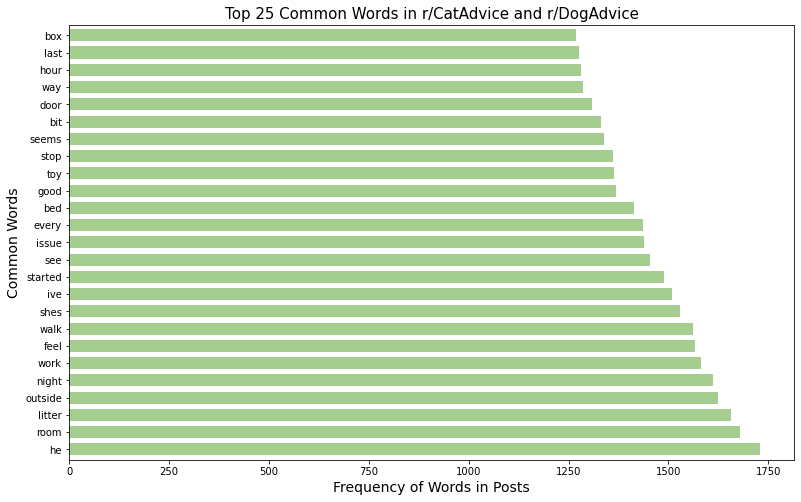

In [14]:
# to plot a bar chat of the top 25 most commonly occuring words for both categories combined
plt.figure(figsize=(13, 8))
ax = full_df_count_df.sum().sort_values(ascending=False).head(25).plot(kind='barh', cmap='crest', width=0.7)

ax.set_title("Top 25 Common Words in r/CatAdvice and r/DogAdvice", fontsize=15)
ax.set_xlabel("Frequency of Words in Posts", fontsize=14)
ax.set_ylabel("Common Words", fontsize=14)

Note that the frequencies of word listed above are not normalised to the number of words or the length of post. However, the chart shows some of the most common pets-related keywords used e.g. litter, room, walk, bed, outside, toy, bed.

In [15]:
# to label the data points as cat or not cat
full_df_count_df['cat?'] = None
full_df_count_df.loc[0:5931,'cat?'] = 1
full_df_count_df.loc[5932:11826,'cat?'] = 0
full_df_count_df['cat?'] = full_df_count_df['cat?'].astype(int)

In [16]:
# to confirm that the column to label the data points is added
full_df_count_df

,abandon,abandoned,abdomen,ability,able,abnormal,abroad,absolute,absolutely,abuse,...,youngest,youre,youtube,youve,yowl,yowling,zero,zone,zoomies,cat?
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11822,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11823,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11824,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11825,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0, 'Frequency of Words in Posts')

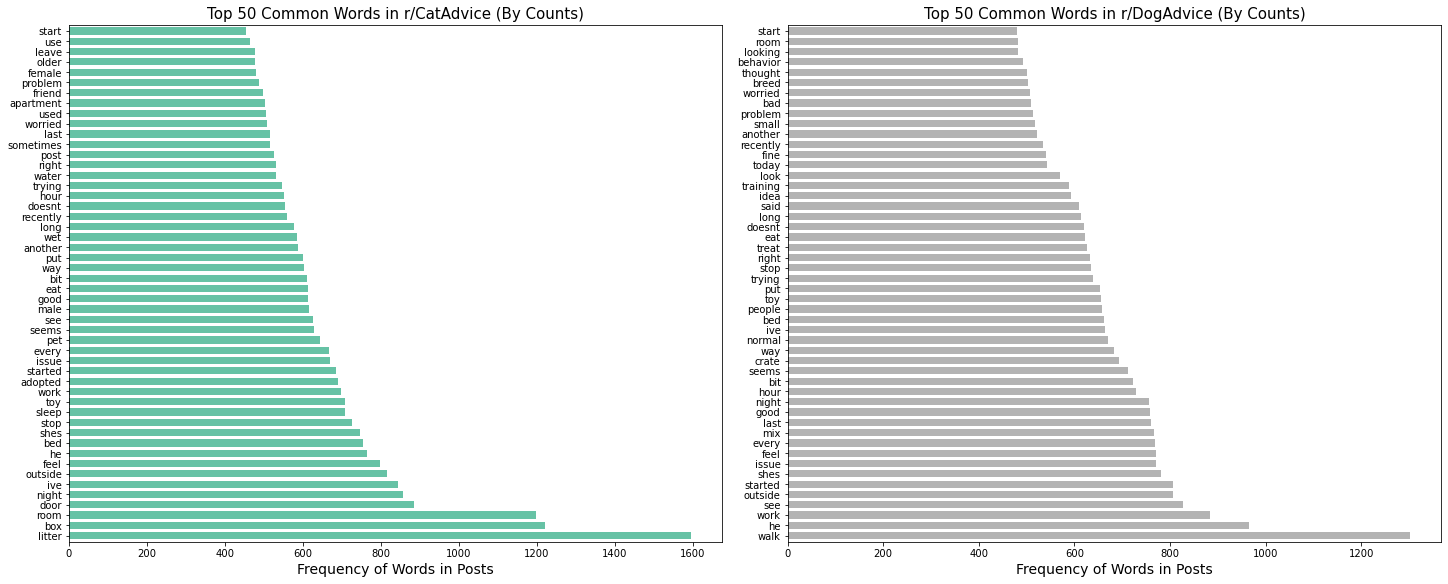

In [17]:
# bar plots to identify the top 25 words in the respective subreddit groups based on word count
fig, axes = plt.subplots(1, 2, figsize=(20,8), sharey=False, layout="constrained")
plot_c = full_df_count_df[full_df_count_df['cat?'] == 1].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[0], cmap='Set2', width=0.7)
plot_c.set_title("Top 50 Common Words in r/CatAdvice (By Counts)", fontsize=15)
plot_c.set_xlabel("Frequency of Words in Posts", fontsize=14)
plot_d = full_df_count_df[full_df_count_df['cat?'] == 0].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[1], cmap='Set2_r', width=0.7)
plot_d.set_title("Top 50 Common Words in r/DogAdvice (By Counts)", fontsize=15)
plot_d.set_xlabel("Frequency of Words in Posts", fontsize=14)

In [18]:
# to label the data points as cat or not cat
count_tfidf_df['cat?'] = None
count_tfidf_df.loc[0:5931,'cat?'] = 1
count_tfidf_df.loc[5932:11826,'cat?'] = 0
count_tfidf_df['cat?'] = count_tfidf_df['cat?'].astype(int)

Text(0.5, 0, 'Weightage of Word in Dataset')

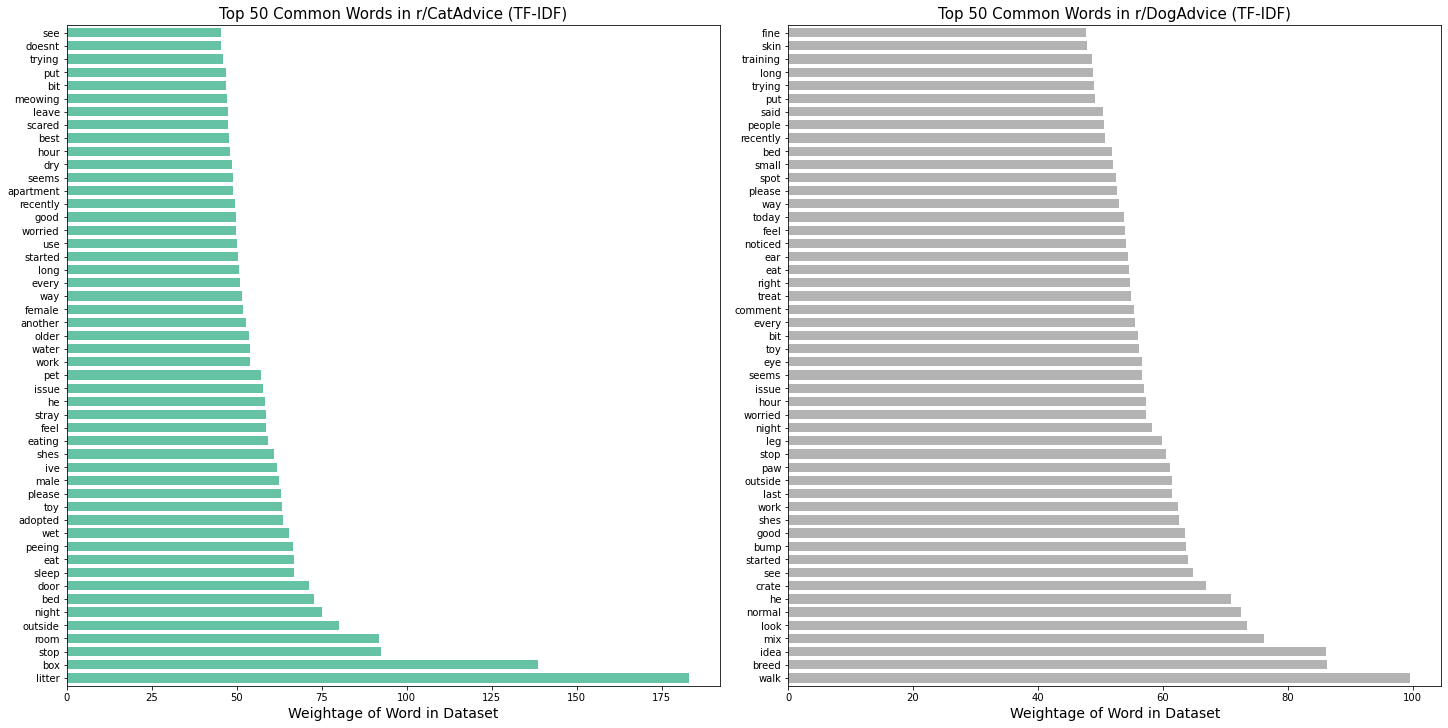

In [19]:
# bar plots to identify the top 50 words in the respective subreddit groups based on word weightage
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=False, layout="constrained")
plot_c2 = count_tfidf_df[count_tfidf_df['cat?'] == 1].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[0], cmap='Set2', width=0.7)
plot_c2.set_title("Top 50 Common Words in r/CatAdvice (TF-IDF)", fontsize=15)
plot_c2.set_xlabel("Weightage of Word in Dataset", fontsize=14)
plot_d2 = count_tfidf_df[count_tfidf_df['cat?'] == 0].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[1], cmap='Set2_r', width=0.7)
plot_d2.set_title("Top 50 Common Words in r/DogAdvice (TF-IDF)", fontsize=15)
plot_d2.set_xlabel("Weightage of Word in Dataset", fontsize=14)

Upon applying weightage on each word based on the number of times it appears in a post and the number of post each word appeared in, we can identify words that are more relevant to the respective categories. For instance, words like litter, box, room, bed, peeing, are most relevant to cat owners, whereas words like walk, breed, mix are most relevant to dog owners.

In [20]:
# to label the data points as cat or not cat
count_bigram_df['cat?'] = None
count_bigram_df.loc[0:5931,'cat?'] = 1
count_bigram_df.loc[5932:11826,'cat?'] = 0
count_bigram_df['cat?'] = count_bigram_df['cat?'].astype(int)

Text(0.5, 0, 'Count of Bi-grams in Dataset')

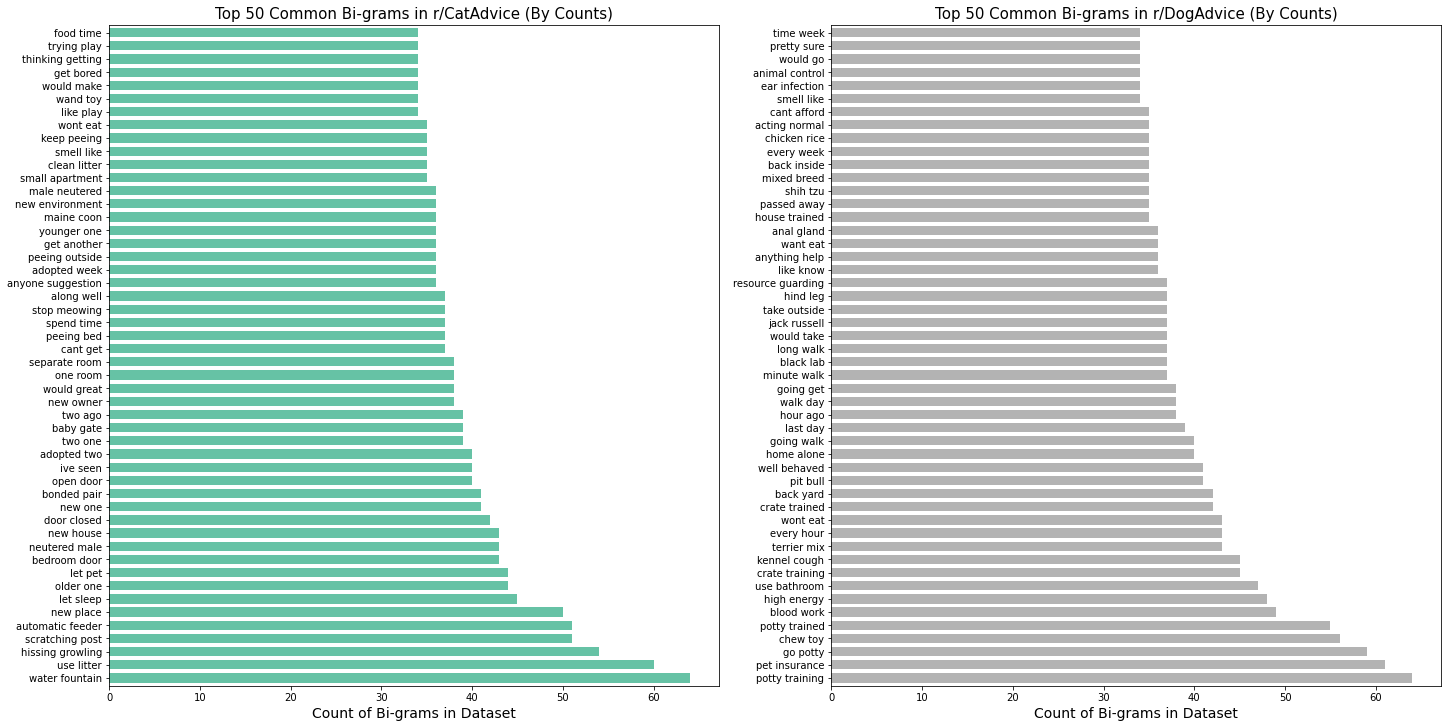

In [21]:
# bar plots to identify the top 50 words in the respective subreddit groups based on frequency of bi-grams
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=False, layout="constrained")
plot_c3 = count_bigram_df[count_bigram_df['cat?'] == 1].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[0], cmap='Set2', width=0.7)
plot_c3.set_title("Top 50 Common Bi-grams in r/CatAdvice (By Counts)", fontsize=15)
plot_c3.set_xlabel("Count of Bi-grams in Dataset", fontsize=14)
plot_d3 = count_bigram_df[count_bigram_df['cat?'] == 0].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[1], cmap='Set2_r', width=0.7)
plot_d3.set_title("Top 50 Common Bi-grams in r/DogAdvice (By Counts)", fontsize=15)
plot_d3.set_xlabel("Count of Bi-grams in Dataset", fontsize=14)

Frequency of word-pairs are also explored. For cat owners, common word-pairs include water fountain, use litter, hissing growling, scratching post. Dog owners mentioned most about potty training, pet insurance, chew toy. 

In [22]:
# to label the data points as cat or not cat
count_trigram_df['cat?'] = None
count_trigram_df.loc[0:5931,'cat?'] = 1
count_trigram_df.loc[5932:11826,'cat?'] = 0
count_trigram_df['cat?'] = count_trigram_df['cat?'].astype(int)

Text(0.5, 0, 'Count of Tri-grams in Dataset')

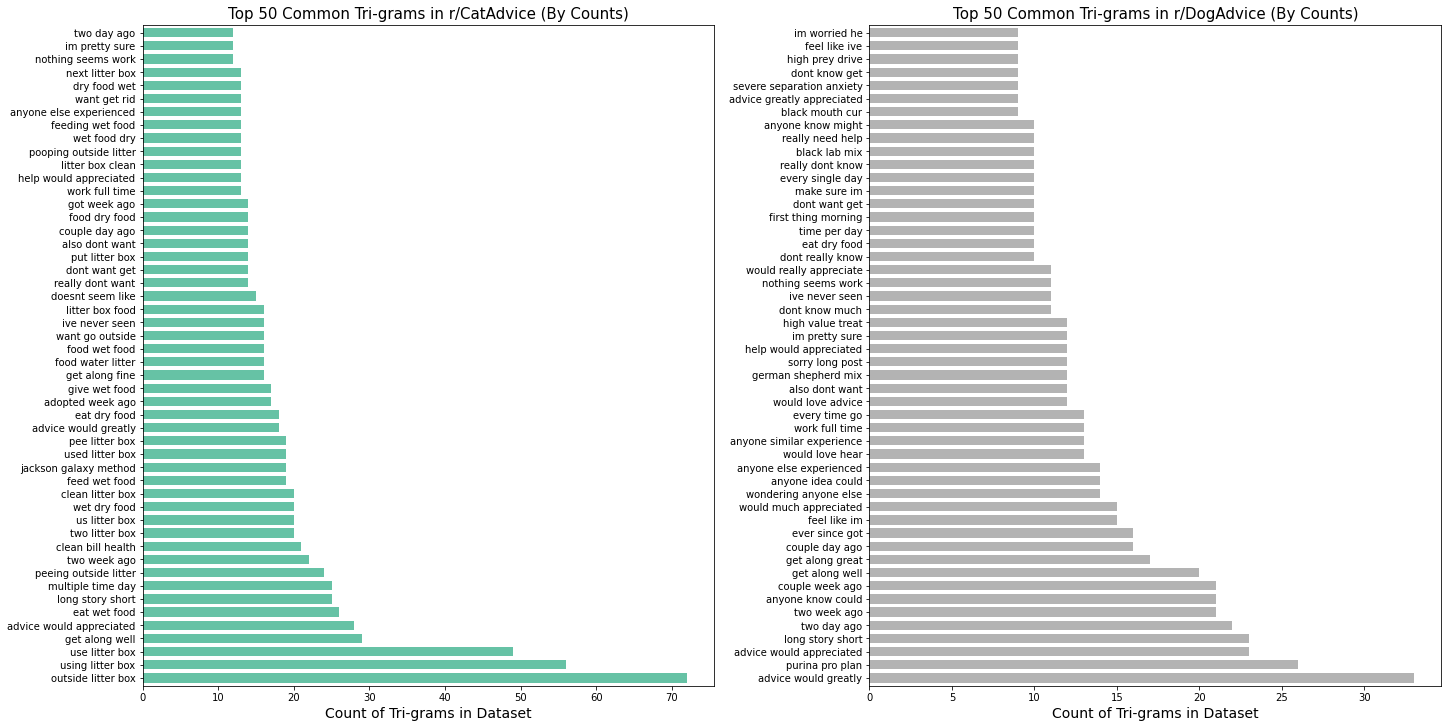

In [23]:
# bar plots to identify the top 50 words in the respective subreddit groups based on frequency of tri-grams
fig, axes = plt.subplots(1, 2, figsize=(20,10), sharey=False, layout="constrained")
plot_c4 = count_trigram_df[count_trigram_df['cat?'] == 1].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[0], cmap='Set2', width=0.7)
plot_c4.set_title("Top 50 Common Tri-grams in r/CatAdvice (By Counts)", fontsize=15)
plot_c4.set_xlabel("Count of Tri-grams in Dataset", fontsize=14)
plot_d4 = count_trigram_df[count_trigram_df['cat?'] == 0].drop(columns='cat?').sum().sort_values(ascending=False).head(50).plot(kind='barh',ax=axes[1], cmap='Set2_r', width=0.7)
plot_d4.set_title("Top 50 Common Tri-grams in r/DogAdvice (By Counts)", fontsize=15)
plot_d4.set_xlabel("Count of Tri-grams in Dataset", fontsize=14)



Tri-grams of the data were also explored as they would give better context to the data. For cat owners, the top few tri-grams are related to litter box, eat wet food, while dog owners discussed more about purina pro plan, and whether their pet dog could get along well with other pets. Based on contextual knowledge, these insights are reasonable for the respective categories. We can safely conclude that there is distinction between the common features for the dog and cat posts. These differentiating factors would be essential for the prediction model to differentiate the content of the posts.

However, note that the counts of tri-grams are relatively small as compared to the size of the dataset. This could give an indication that models that build upon tri-gram dataset feature would be prone to overfitting due to high variance as there would be many sets of tri-grams within the dataset.

<AxesSubplot:>

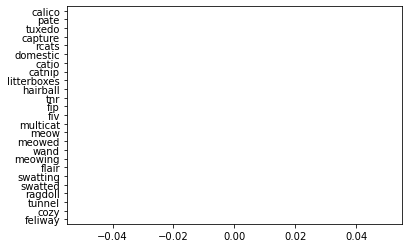

In [25]:
# to explore the trigrams with the least weightage
full_df_count_df[full_df_count_df['cat?'] == 0].drop(columns='cat?').sum().sort_values(ascending=True).head(25).plot(kind='barh')

From the bottom of the list of words, it is observed that some of the words (e.g. meow, litterboxes) are also found in the list of top 50 words. However, the spelling in the original post could have affected the word transformation and as a result, these words were not included in the count. Such occurences could have implications on the predictive power of the words and would ultimately affect the accuracy of the model if the number of occurences is huge.

### Modeling Process

In [26]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, plot_roc_curve, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [27]:
# to print out the size of the data for uni-gram
full_df_count_df.shape

(11827, 4005)

In [28]:
# to print out the size of the data for bi-gram
count_bigram_df.shape

(11827, 4102)

In [29]:
# to print out the size of the data for tri-gram
count_trigram_df.shape

(11827, 4232)

In [30]:
# to print out the size of the data for TF-IDF
count_tfidf_df.shape

(11827, 4005)

In [31]:
#unigram (count)

# include all available uni-grams excluding 'cat?' column (last column) into the X variable 
X_uni = full_df_count_df.iloc[:, 0:4004]

# retrieve the last column 'cat?'
y_uni = full_df_count_df.iloc[:, -1]

In [32]:
#bigram

# include all available bi-grams excluding 'cat?' column (last column) into the X variable 
X_bigr = count_bigram_df.iloc[:, 0:4101]

# retrieve the last column 'cat?'
y_bigr = count_bigram_df.iloc[:, -1]

In [33]:
#trigram

# include all available tri-grams excluding 'cat?' column (last column) into the X variable 
X_trigr = count_trigram_df.iloc[:, 0:4231]

# retrieve the last column 'cat?'
y_trigr = count_trigram_df.iloc[:, -1]

In [34]:
#tfidf

# include all available tri-grams excluding 'cat?' column (last column) into the X variable 
X_tf = count_tfidf_df.iloc[:, 0:4004]

# retrieve the last column 'cat?'
y_tf = count_tfidf_df.iloc[:, -1]

In [35]:
# (1) train_test_split for unigram dataset
X_train_uni, X_test_uni, y_train_uni, y_test_uni = train_test_split(X_uni, y_uni, test_size=.2, random_state=2)

In [36]:
# (2) train_test_split for bigram dataset
X_train_bigr, X_test_bigr, y_train_bigr, y_test_bigr = train_test_split(X_bigr, y_bigr, test_size=.2, random_state=2)

In [37]:
# (3) train_test_split for trigram dataset
X_train_trigr, X_test_trigr, y_train_trigr, y_test_trigr = train_test_split(X_trigr, y_trigr, test_size=.2, random_state=2)

In [38]:
# (4) train_test_split for tfidf dataset
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size=.2, random_state=2)

#### Naive Bayes - Bernoulli

In [39]:
# function for Bernoulli
def bernoulli_NB(input, X_tr, y_tr, X_tst, y_tst, description):
    BernNB = BernoulliNB(binarize=input)
    BernNB.fit(X_tr, y_tr)
    print(BernNB)
    y_pred_tr = BernNB.predict(X_tr)
    y_pred_tst = BernNB.predict(X_tst)
    score_tr = accuracy_score(y_tr, y_pred_tr)
    score_tst = accuracy_score(y_tst, y_pred_tst)
    print('Training score with', description, 'features:', score_tr)
    print('Test score with', description, 'features:', score_tst)
    print(classification_report(y_tst, y_pred_tst))

    params = {"binarize":[None, 0.25, 0.5, 0.75]}
    model_bn = GridSearchCV(BernoulliNB(), params, cv=5)
    model_bn.fit(X_tr, y_tr)
    print(model_bn.best_params_)
    print(model_bn.best_score_)

    plot_roc_curve(BernNB, X_tst, y_tst)
    plt.plot([0, 1], [0, 1],
    label='baseline', linestyle='--')
    plt.legend()
    plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for Bernoulli-NB {description}')
    return 

BernoulliNB(binarize=None)
Training score with Uni-gram features: 0.8195750977697918
Test score with Uni-gram features: 0.8119188503803888
              precision    recall  f1-score   support

           0       0.90      0.70      0.79      1175
           1       0.76      0.92      0.83      1191

    accuracy                           0.81      2366
   macro avg       0.83      0.81      0.81      2366
weighted avg       0.83      0.81      0.81      2366

{'binarize': 0.25}
0.7986484086804729


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


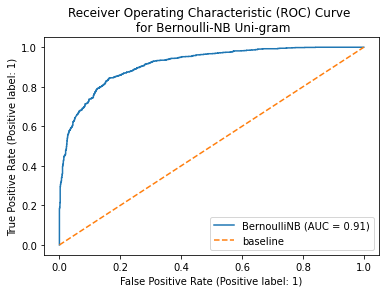

In [40]:
# Bernoulli (binarize=None) / uni-gram feature
bernoulli_NB(None, X_train_uni, y_train_uni, X_test_uni, y_test_uni, 'Uni-gram')

Optimisation was not done for the above model as the accuracy for binarize=0.25 is lower compared to when binarize=None.

BernoulliNB(binarize=None)
Training score with Bi-gram features: 0.7377655638938801
Test score with Bi-gram features: 0.672865595942519
              precision    recall  f1-score   support

           0       0.64      0.80      0.71      1175
           1       0.73      0.55      0.63      1191

    accuracy                           0.67      2366
   macro avg       0.68      0.67      0.67      2366
weighted avg       0.69      0.67      0.67      2366

{'binarize': None}
0.677731354751957


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


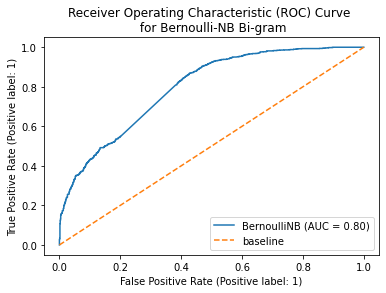

In [41]:
# Bernoulli (binarize=None) / bi-gram feature
bernoulli_NB(None, X_train_bigr, y_train_bigr, X_test_bigr, y_test_bigr, 'Bi-gram')

BernoulliNB(binarize=None)
Training score with Tri-gram features: 0.6821689039213614
Test score with Tri-gram features: 0.5743871513102282
              precision    recall  f1-score   support

           0       0.55      0.85      0.66      1175
           1       0.67      0.31      0.42      1191

    accuracy                           0.57      2366
   macro avg       0.61      0.58      0.54      2366
weighted avg       0.61      0.57      0.54      2366

{'binarize': 0.25}
0.5831308515069986


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


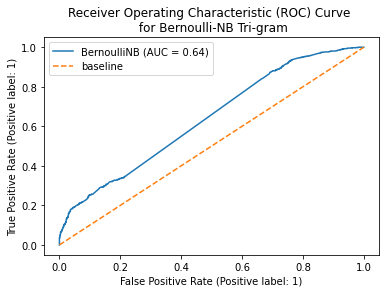

In [42]:
# Bernoulli (binarize = None) / tri-gram feature
bernoulli_NB(None, X_train_trigr, y_train_trigr, X_test_trigr, y_test_trigr, 'Tri-gram')

BernoulliNB(binarize=None)
Training score with TF-IDF features: 0.8790825494133813
Test score with TF-IDF features: 0.8415046491969569
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1175
           1       0.83      0.87      0.85      1191

    accuracy                           0.84      2366
   macro avg       0.84      0.84      0.84      2366
weighted avg       0.84      0.84      0.84      2366

{'binarize': None}
0.8374379180445594


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


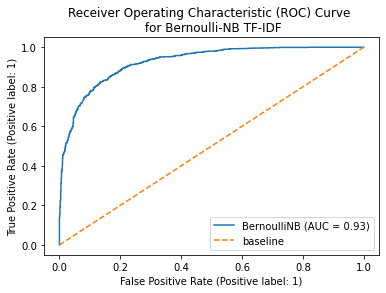

In [43]:
# Bernoulli (binarize = None)/ TFIDF feature
bernoulli_NB(None, X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'TF-IDF')

In [77]:
# instantiate the model to derive the coefficients
BernNB = BernoulliNB(binarize=None)
BernNB.fit(X_train_tf, y_train_tf)
y_pred_tr = BernNB.predict_proba(X_train_tf)

c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 0, 'Coefficient')

<Figure size 720x360 with 0 Axes>

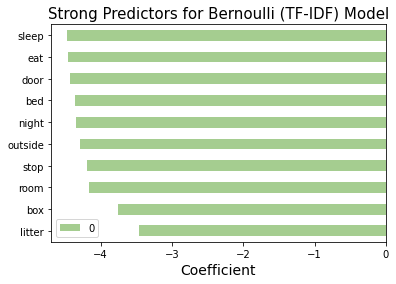

In [87]:
# to identify the top few strong predictors for the model
plt.figure(figsize=(10, 5))
plot_b =pd.DataFrame(BernNB.coef_[0], index = X_train_tf.columns).sort_values(by=0, ascending=False).head(10).plot(kind='barh', cmap='crest')
plot_b.set_title("Strong Predictors for Bernoulli (TF-IDF) Model", fontsize=15)
plot_b.set_xlabel("Coefficient", fontsize=14)

For Naive Bayes Bernoulli model, the model with TF-IDF applied to the data set performed the best with an accuracy of 84 %, with a high AUC of 0.93. Strong predictors for the model include sleep, door, bed, box, litter.

#### Naive Bayes - Multinomial

In [44]:
# function for Multinomial 
def multi_NB(X_tr, y_tr, X_tst, y_tst, description):
    MultiNB = MultinomialNB()
    MultiNB.fit(X_tr, y_tr)
    y_pred_tr = MultiNB.predict(X_tr)
    y_pred_tst = MultiNB.predict(X_tst)
    score_tr = accuracy_score(y_tr, y_pred_tr)
    score_tst = accuracy_score(y_tst, y_pred_tst) #y actual, y predicted
    print('Training score with', description, 'features:', score_tr)
    print('Test score with', description, 'features:', score_tst)
    print(classification_report(y_tst, y_pred_tst))

    plot_roc_curve(MultiNB, X_tst, y_tst)
    plt.plot([0, 1], [0, 1],
    label='baseline', linestyle='--')
    plt.legend()
    plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for Multinomial-NB {description}')
    return MultiNB

Training score with Uni-gram features: 0.8508614311383574
Test score with Uni-gram features: 0.8338968723584108
              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1175
           1       0.87      0.79      0.83      1191

    accuracy                           0.83      2366
   macro avg       0.84      0.83      0.83      2366
weighted avg       0.84      0.83      0.83      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

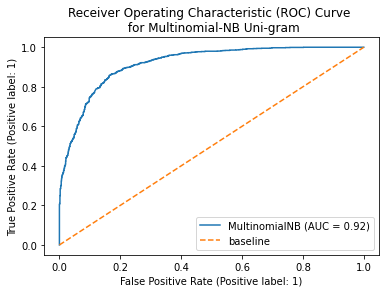

In [45]:
# Multinomial / Uni-gram feature
multi_NB(X_train_uni, y_train_uni, X_test_uni, y_test_uni, 'Uni-gram')

Training score with Bi-gram features: 0.7791988161927914
Test score with Bi-gram features: 0.7134404057480981
              precision    recall  f1-score   support

           0       0.76      0.62      0.68      1175
           1       0.68      0.81      0.74      1191

    accuracy                           0.71      2366
   macro avg       0.72      0.71      0.71      2366
weighted avg       0.72      0.71      0.71      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

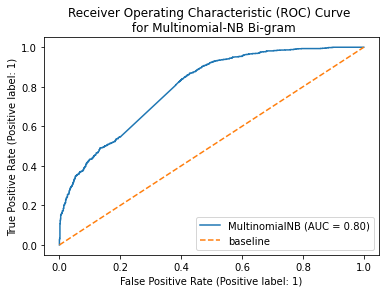

In [46]:
# Multinomial / bi-gram feature
multi_NB(X_train_bigr, y_train_bigr, X_test_bigr, y_test_bigr, 'Bi-gram')

Training score with Tri-gram features: 0.6852341190149033
Test score with Tri-gram features: 0.5984784446322908
              precision    recall  f1-score   support

           0       0.67      0.38      0.49      1175
           1       0.57      0.81      0.67      1191

    accuracy                           0.60      2366
   macro avg       0.62      0.60      0.58      2366
weighted avg       0.62      0.60      0.58      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

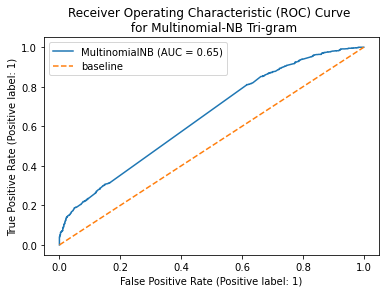

In [47]:
# Multinomial / tri-gram feature
multi_NB(X_train_trigr, y_train_trigr, X_test_trigr, y_test_trigr, 'Tri-gram')

Training score with TF-IDF features: 0.8717894514321953
Test score with TF-IDF features: 0.8305156382079459
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1175
           1       0.84      0.82      0.83      1191

    accuracy                           0.83      2366
   macro avg       0.83      0.83      0.83      2366
weighted avg       0.83      0.83      0.83      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


MultinomialNB()

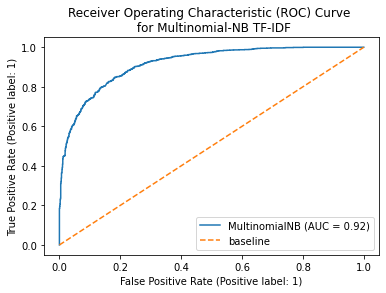

In [48]:
# Multinomial / TFIDF feature
multi_NB(X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'TF-IDF')

For Naive Bayes Multinomial model, the model with Uni-gram and TF-IDF performed equally well, with an accuracy of 83 %, with a high AUC of 0.92. 

#### Naive Bayes - Gaussian

In [49]:
# function for Gaussian
def gaussian_NB(X_tr, y_tr, X_tst, y_tst, description):
    GausNB = GaussianNB()
    GausNB.fit(X_tr, y_tr)
    y_pred_tr = GausNB.predict(X_tr)
    y_pred_tst = GausNB.predict(X_tst)
    score_tr = accuracy_score(y_tr, y_pred_tr)
    score_tst = accuracy_score(y_tst, y_pred_tst) #y actual, y predicted
    print('Training score with', description, 'features:', score_tr)
    print('Test score with', description, 'features:', score_tst)
    print(classification_report(y_tst, y_pred_tst))
    
  
    plot_roc_curve(GausNB, X_tst, y_tst)
    plt.plot([0, 1], [0, 1],
    label='baseline', linestyle='--')
    plt.legend()
    plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for Gaussian-NB {description}')
    return GausNB

Training score with Uni-gram features: 0.7963217418877497
Test score with Uni-gram features: 0.7700760777683855
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      1175
           1       0.71      0.91      0.80      1191

    accuracy                           0.77      2366
   macro avg       0.79      0.77      0.77      2366
weighted avg       0.79      0.77      0.77      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


GaussianNB()

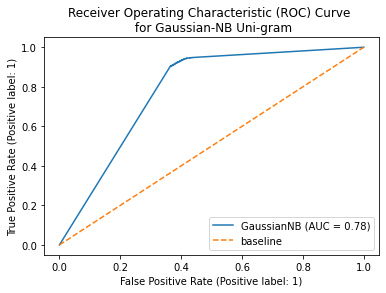

In [50]:
# Gaussian / Uni-gram feature
gaussian_NB(X_train_uni, y_train_uni, X_test_uni, y_test_uni, 'Uni-gram')

Training score with Bi-gram features: 0.7778247542543072
Test score with Bi-gram features: 0.7109044801352493
              precision    recall  f1-score   support

           0       0.77      0.59      0.67      1175
           1       0.67      0.83      0.74      1191

    accuracy                           0.71      2366
   macro avg       0.72      0.71      0.71      2366
weighted avg       0.72      0.71      0.71      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


GaussianNB()

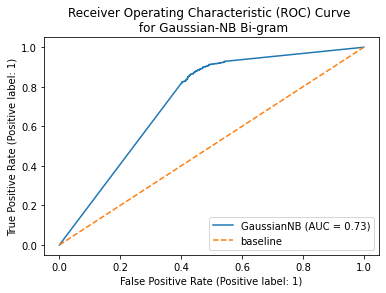

In [51]:
# Gaussian / bi-gram feature
gaussian_NB(X_train_bigr, y_train_bigr, X_test_bigr, y_test_bigr, 'Bi-gram')

Training score with Tri-gram features: 0.6616636719162879
Test score with Tri-gram features: 0.5642434488588335
              precision    recall  f1-score   support

           0       0.54      0.87      0.67      1175
           1       0.67      0.26      0.38      1191

    accuracy                           0.56      2366
   macro avg       0.61      0.57      0.52      2366
weighted avg       0.61      0.56      0.52      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


GaussianNB()

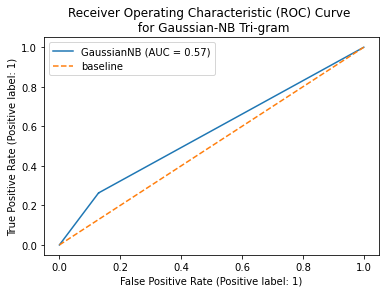

In [52]:
# Gaussian / tri-gram feature
gaussian_NB(X_train_trigr, y_train_trigr, X_test_trigr, y_test_trigr, 'Tri-gram')

Training score with TF-IDF features: 0.877814184547088
Test score with TF-IDF features: 0.7924767540152156
              precision    recall  f1-score   support

           0       0.82      0.74      0.78      1175
           1       0.77      0.84      0.80      1191

    accuracy                           0.79      2366
   macro avg       0.80      0.79      0.79      2366
weighted avg       0.80      0.79      0.79      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


GaussianNB()

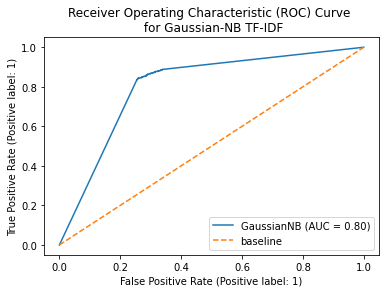

In [53]:
# Gaussian / TFIDF feature
gaussian_NB(X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'TF-IDF')

For Naive Bayes Gaussian model, the model with TF-IDF applied on the data set was the best performer, with an accuracy of 79 %, and an AUC of 0.80. 

Comparing within the Naive Bayes model, the Bernoulli model with TF-IDF was the best performing model and it will be used to compare with the Logistic Regression and KNN models. Bernoulli model is an appropriate model for predicting binary outcomes, hence this result is within expectations.

It is also observed that models that used bi-gram or tri-gram features tend to perform poorly with accuracy less than 80%. This observation is true for logistic regression and KNN models. As shown in the bar chart in the EDA section, the frequencies of the bi-grams and tri-grams are relatively low compared to the size of the dataset - insufficient data to train the model.  

#### Logistic Regression

In [54]:
# function for logistic regression
def logistic_regression(X_tr, y_tr, X_tst, y_tst, description):
    LogReg = LogisticRegression(solver='liblinear')
    log_model = LogReg.fit(X_tr, y_tr)
    y_pred_log = LogReg.predict(X_tst)
    score_tr = log_model.score(X_tr, y_tr)
    score_tst = log_model.score(X_tst, y_tst)
    print('Training score with', description, 'features:', score_tr)
    print('Test score with', description, 'features:', score_tst)
    print(classification_report(y_tst, y_pred_log))

    plot_roc_curve(LogReg, X_tst, y_tst)
    plt.plot([0, 1], [0, 1],
    label='baseline', linestyle='--')
    plt.legend()
    plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for Logistic Regression {description}')
    return log_model

Training score with Uni-gram features: 0.9376387274072508
Test score with Uni-gram features: 0.8330515638207946
              precision    recall  f1-score   support

           0       0.86      0.79      0.83      1175
           1       0.81      0.87      0.84      1191

    accuracy                           0.83      2366
   macro avg       0.83      0.83      0.83      2366
weighted avg       0.83      0.83      0.83      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(solver='liblinear')

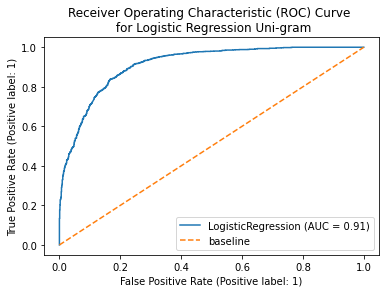

In [55]:
# unigram logistic regression
logistic_regression(X_train_uni, y_train_uni, X_test_uni, y_test_uni, 'Uni-gram')

Training score with Bi-gram features: 0.8426170595074517
Test score with Bi-gram features: 0.6910397295012679
              precision    recall  f1-score   support

           0       0.74      0.58      0.65      1175
           1       0.66      0.80      0.72      1191

    accuracy                           0.69      2366
   macro avg       0.70      0.69      0.69      2366
weighted avg       0.70      0.69      0.69      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(solver='liblinear')

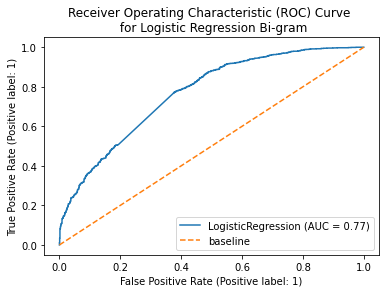

In [56]:
# bigram logistic regression
logistic_regression(X_train_bigr, y_train_bigr, X_test_bigr, y_test_bigr, 'Bi-gram')

Training score with Tri-gram features: 0.7130324490011627
Test score with Tri-gram features: 0.5684699915469146
              precision    recall  f1-score   support

           0       0.54      0.79      0.65      1175
           1       0.63      0.35      0.45      1191

    accuracy                           0.57      2366
   macro avg       0.59      0.57      0.55      2366
weighted avg       0.59      0.57      0.55      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(solver='liblinear')

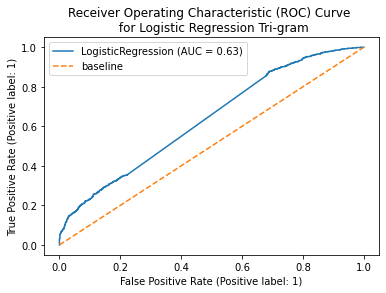

In [57]:
# trigram logistic regression
logistic_regression(X_train_trigr, y_train_trigr, X_test_trigr, y_test_trigr, 'Tri-gram')

Training score with TF-IDF features: 0.8971567487580594
Test score with TF-IDF features: 0.8444632290786137
              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1175
           1       0.83      0.86      0.85      1191

    accuracy                           0.84      2366
   macro avg       0.84      0.84      0.84      2366
weighted avg       0.84      0.84      0.84      2366



c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


LogisticRegression(solver='liblinear')

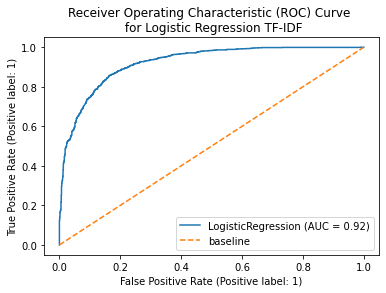

In [58]:
# tfidf logistic regression
logistic_regression(X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'TF-IDF')

For logistic regression, the model with TF-IDF feature performed the best with an accuracy of 84% and an AUC of 0.92. 

In [59]:
# Optimisation for logistic regression using TF-IDF
pipe_log = Pipeline([
    ('ss', StandardScaler()),
    ('log', LogisticRegression(solver = 'liblinear'))
    ])
pipe_log_params = {'log__penalty': ['l1', 'l2'],
            'log__C': [1.0, 0.1]}

gs_log = GridSearchCV(pipe_log, pipe_log_params, cv=5, verbose=1)
gs_log.fit(X_train_tf, y_train_tf)
print(gs_log.best_params_)
print(gs_log.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
{'log__C': 0.1, 'log__penalty': 'l1'}
0.8179893878526538


In [67]:
LogReg = LogisticRegression(solver='liblinear', penalty='l1', C=0.1)
log_model = LogReg.fit(X_train_tf, y_train_tf)
y_pred_log = LogReg.predict(X_test_tf)
score_tr = log_model.score(X_train_tf, y_train_tf)
score_tst = log_model.score(X_test_tf, y_test_tf)
print('Training score with TF-IDF features:', score_tr)
print('Test score with TF-IDF features:', score_tst)
print(classification_report(y_test_tf, y_pred_log))

Training score with TF-IDF features: 0.7140894197230737
Test score with TF-IDF features: 0.7286559594251902
              precision    recall  f1-score   support

           0       0.85      0.55      0.67      1175
           1       0.67      0.90      0.77      1191

    accuracy                           0.73      2366
   macro avg       0.76      0.73      0.72      2366
weighted avg       0.76      0.73      0.72      2366



The optimsation parameters reduced the accuracy of the model from 84% to 82% (train data) and 73% (test data). As such, the hyperparameters will not be applied and the default setting was used.

In [60]:
# to extract the coefficients of the best performing Logistic Regression model
LogReg = LogisticRegression(solver='liblinear')
log_model = LogReg.fit(X_train_tf, y_train_tf)

Text(0.5, 0, 'Coefficient')

<Figure size 720x360 with 0 Axes>

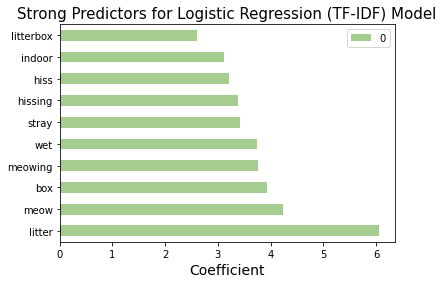

In [88]:
# to extract coefficients of the strongest predictors for cat
plt.figure(figsize=(10, 5))
plot_l = pd.DataFrame(LogReg.coef_[0], index = X_train_tf.columns).sort_values(by=0, ascending=False).head(10).plot(kind='barh', cmap='crest')
plot_l.set_title("Strong Predictors for Logistic Regression (TF-IDF) Model", fontsize=15)
plot_l.set_xlabel("Coefficient", fontsize=14)

Text(0.5, 0, 'Coefficient')

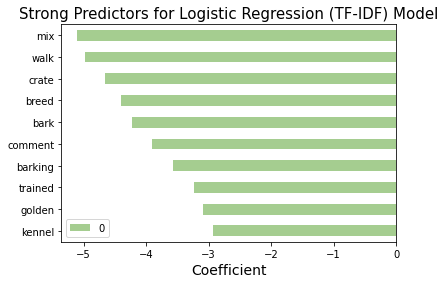

In [89]:
# to extract coefficients of the strongest predictors for dog
plot_lr = pd.DataFrame(LogReg.coef_[0], index = X_train_tf.columns).sort_values(by=0, ascending=False).tail(10).plot(kind='barh' , cmap='crest')
plot_lr.set_title("Strong Predictors for Logistic Regression (TF-IDF) Model", fontsize=15)
plot_lr.set_xlabel("Coefficient", fontsize=14)

The strongest predictors for cat are litter, meow, box, wet, stray. The stronges preditors for dog are mix, walk, crate, breed, bark.

#### K-Nearest Neighbours

In [63]:
# function for KNN
def knn_classifier(k, X_tr, y_tr, X_tst, y_tst, description):
    scaler = StandardScaler()
    scaler.fit(X_tr)
    X_tr = scaler.transform(X_tr)
    X_tst = scaler.transform(X_tst)
    
    knn = KNeighborsClassifier(n_neighbors= k )  # Instantiate a class instance of KNN class with an initial parameter value
    knn.fit(X_tr, y_tr)
    y_pred_knn = knn.predict(X_tst)
    score_tr = knn.score(X_tr, y_tr)
    score_tst = knn.score(X_tst, y_tst)
    print('Training score with', description, 'features:', score_tr)
    print('Test score with', description, 'features:', score_tst)
    print(classification_report(y_tst, y_pred_knn))
    params = {"n_neighbors":[3,4,5,6,7,8,9,10,11,12,13,14,15]}
    model_knn = GridSearchCV(knn, params, cv=5)
    model_knn.fit(X_tr, y_tr)
    print(f'Best parameter: {model_knn.best_params_}')
    print(f'Best accuracy: {model_knn.best_score_}')

    plot_roc_curve(knn, X_tst, y_tst)
    plt.plot([0, 1], [0, 1],
    label='baseline', linestyle='--')
    plt.legend()
    plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for K-Nearest Neighbours (K = {k}) {description}')
    return

Training score with Uni-gram features: 0.8106965437057394
Test score with Uni-gram features: 0.6673710904480136
              precision    recall  f1-score   support

           0       0.75      0.50      0.60      1175
           1       0.63      0.83      0.72      1191

    accuracy                           0.67      2366
   macro avg       0.69      0.67      0.66      2366
weighted avg       0.69      0.67      0.66      2366

Best parameter: {'n_neighbors': 6}
Best accuracy: 0.6646229180836485


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


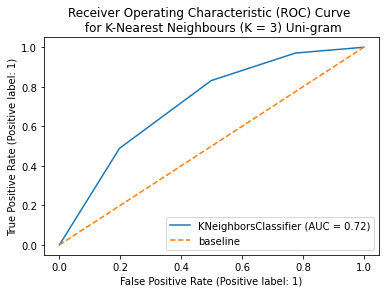

In [64]:
# Unigram k-NN, n_neighbours=3
knn_classifier(3, X_train_uni, y_train_uni, X_test_uni, y_test_uni, 'Uni-gram')

Training score with Bi-gram features: 0.7176831201775711
Test score with Bi-gram features: 0.6001690617075233
              precision    recall  f1-score   support

           0       0.65      0.42      0.51      1175
           1       0.58      0.78      0.66      1191

    accuracy                           0.60      2366
   macro avg       0.61      0.60      0.59      2366
weighted avg       0.61      0.60      0.59      2366

Best parameter: {'n_neighbors': 6}
Best accuracy: 0.5784814756491313


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


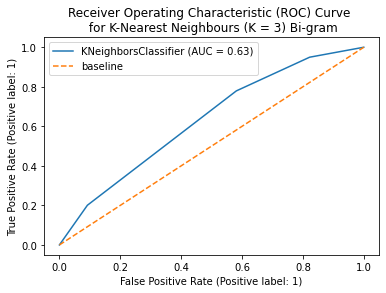

In [68]:
# bigram k-NN, n_neighbours=3
knn_classifier(3, X_train_bigr, y_train_bigr, X_test_bigr, y_test_bigr, 'Bi-gram')

Training score with Tri-gram features: 0.6292146707536201
Test score with Tri-gram features: 0.5473372781065089
              precision    recall  f1-score   support

           0       0.64      0.20      0.31      1175
           1       0.53      0.89      0.66      1191

    accuracy                           0.55      2366
   macro avg       0.58      0.55      0.49      2366
weighted avg       0.58      0.55      0.49      2366

Best parameter: {'n_neighbors': 4}
Best accuracy: 0.5337695683105332


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


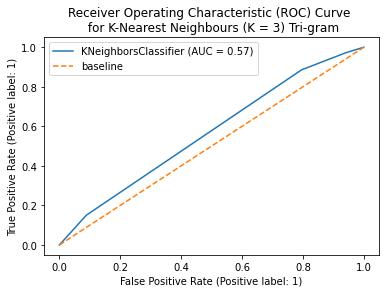

In [69]:
# trigram k-NN, n_neighbours = 3
knn_classifier(3, X_train_trigr, y_train_trigr, X_test_trigr, y_test_trigr, 'Tri-gram')

Training score with TF-IDF features: 0.64168692527217
Test score with TF-IDF features: 0.5672020287404903
              precision    recall  f1-score   support

           0       0.71      0.22      0.33      1175
           1       0.54      0.91      0.68      1191

    accuracy                           0.57      2366
   macro avg       0.63      0.56      0.51      2366
weighted avg       0.63      0.57      0.51      2366

Best parameter: {'n_neighbors': 4}
Best accuracy: 0.5708693093169561


c:\Users\gyinh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


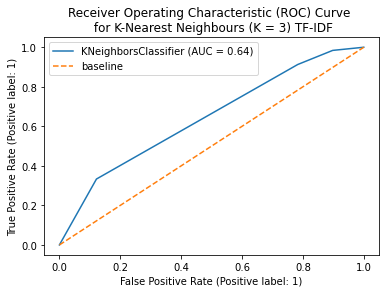

In [70]:
# tfidf k-NN, n_neighbours = 3
knn_classifier(3, X_train_tf, y_train_tf, X_test_tf, y_test_tf, 'TF-IDF')

#### Model Comparison Table 

For the evaluation of the models, the F1 score, AUC and accuracy are selected as the evaluation metrics.

| Model | Data Vectorization | Precision | Recall | F1 Score | Accuracy (Train) | Accuracy (Test) | AUC |
| :-- | :-- | :-- | :-- | :-- | :-- | :-- | :-- |
| Bernoulli | Uni-gram |0.76|0.92|0.83|0.82|0.81|0.91|
| Bernoulli | Bi-gram |0.73|0.55|0.63|0.74|0.67|0.80|
| Bernoulli | Tri-gram |0.67|0.31|0.42|0.68|0.57|0.64|
| **Bernoulli** | **TF-IDF** |0.83|0.87|0.85|0.88|0.84|0.93|
| Multinomial | Uni-gram |0.87|0.79|0.83|0.85|0.83|0.92|
| Multinomial | Bi-gram |0.68|0.81|0.74|0.78|0.71|0.80|
| Multinomial | Tri-gram |0.57|0.81|0.67|0.69|0.60|0.65|
| Multinomial | TF-IDF |0.84|0.82|0.83|0.87|0.83|0.92|
| Gaussian | Uni-gram |0.71|0.91|0.80|0.80|0.77|0.78|
| Gaussian | Bi-gram |0.67|0.83|0.74|0.78|0.71|0.73|
| Gaussian | Tri-gram |0.67|0.26|0.38|0.66|0.56|0.57|
| Gaussian | TF-IDF |0.77|0.84|0.80|0.88|0.79|0.80|
| Logistic | Uni-gram |0.81|0.87|0.84|0.94|0.83|0.91|
| Logistic | Bi-gram |0.66|0.80|0.72|0.84|0.69|0.77|
| Logistic | Tri-gram |0.63|0.35|0.45|0.71|0.57|0.63|
| Logistic | TF-IDF |0.83|0.86|0.85|0.90|0.84|0.92|
| K-NN | Uni-gram |0.63|0.83|0.72|0.81|0.67|0.72|
| K-NN | Bi-gram |0.58|0.78|0.66|0.72|0.60|0.63|
| K-NN | Tri-gram |0.53|0.89|0.66|0.63|0.55|0.57|
| **K-NN (Baseline)** | **TF-IDF**|0.54|0.91|0.68|0.64|0.57|0.64|

<Figure size 432x288 with 0 Axes>

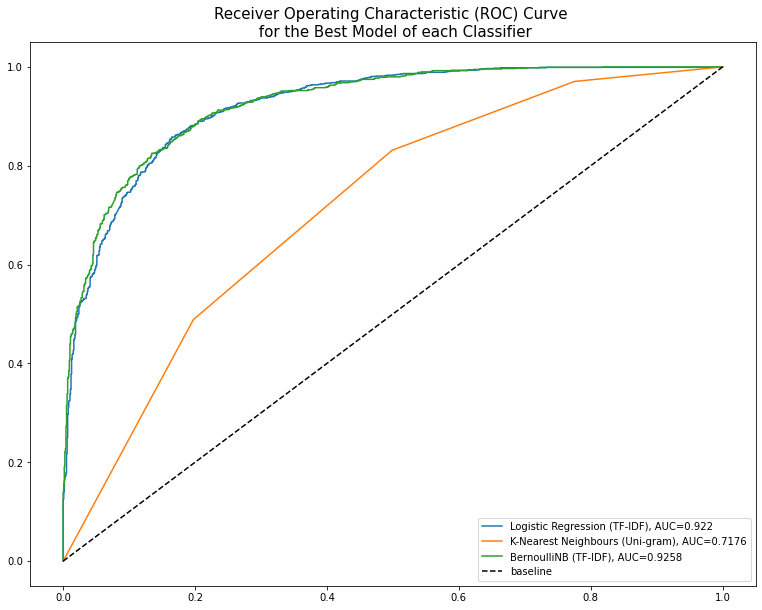

In [71]:
# ROC plot of 3 best models from Logistic Regression, KNN, and Naive Bayes for comparison

plt.figure(0).clf()
plt.figure(figsize = (13,10))
plt.title(f'Receiver Operating Characteristic (ROC) Curve \n for the Best Model of each Classifier', fontsize=15)

# Logistic Regression - TF-IDF
LogReg = LogisticRegression(solver='liblinear')
log_model = LogReg.fit(X_train_tf, y_train_tf)
y_pred_log = LogReg.predict_proba(X_test_tf)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_log)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_log), 4)
plt.plot(fpr,tpr,label="Logistic Regression (TF-IDF), AUC="+str(auc))

# K-Nearest Neighbour - Uni-gram
scaler = StandardScaler()
scaler.fit(X_train_uni)
X_train_uni = scaler.transform(X_train_uni)
X_test_uni = scaler.transform(X_test_uni)
knn = KNeighborsClassifier(n_neighbors= 3 ) 
knnmodel = knn.fit(X_train_uni, y_train_uni)
y_pred_knn = knn.predict_proba(X_test_uni)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_knn)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_knn), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbours (Uni-gram), AUC="+str(auc))

# Naive Bayers-Bernoulli - TF-IDF
BernNB = BernoulliNB(binarize=None)
bern_model = BernNB.fit(X_train_tf, y_train_tf)
y_pred_bern = BernNB.predict_proba(X_test_tf)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test_tf, y_pred_bern)
auc = round(metrics.roc_auc_score(y_test_tf, y_pred_bern), 4)
plt.plot(fpr,tpr,label="BernoulliNB (TF-IDF), AUC="+str(auc))


plt.plot([0, 1], [0, 1],
label='baseline', linestyle='--', color="black")
#add legend
plt.legend()


Out of the three identified models, the Naive Bayes Bernoulli model on TF-IDF data (green line) is the best performing model with 84% accuracy and AUC of 0.93. The accuracy score difference between training and test data sets is less than 0.1 (0.88-0.84), indicating that there is no overfitting of data. The model also has an F1 score of 0.85, the highest relative to all the models tested - this model has a good balance between high precision and recall compared to the other models. Compared to the baseline model (KNN - TF-IDF), the accuracy (test) has increased by 27% (84%-57%).

## Limitations
- Free text data - misspelt words could affect the word processing (e.g. Lemmatisation) and ultimately, the word count. This is crucial as the predictive models operates on the probabilities of words occurring for the respective categories. If the number of words misspelt and misclassified  is huge, the probabilities of the words would be underestimated, and this would have consequential impact on the model's performance. 
- The moderation requirements for both subreddits are different and result in data sets of different quality in the content. For instance, the r/CatAdvice moderators are very stringent in controlling the content such that irrelevant or repeated ones were removed. Images were also not allowed. On the contrary, the moderators for r/DogAdvice were less stringent - there were many post with images only. 

### Next Steps
- With the best model identified, further tuning (e.g. boosting) could be carried out to further increase the accuracy and evaluate the performance with unseen data with the aim of increasing the accuracy to at least 90%. 

## Conclusion

In summary, the new Naive Bayes Bernoulli (TF-IDF) model designed was able to increase the accuracy rate than the existing KNN (TF-IDF) model by 27%, to 84%. This would allow better classification of the queries by the chatbot so that it could pick out relevant responses/information for pet owners without requiring much human intervention. This would help reduce manpower consumption on managing simple queries so that the staff could focus on attending to pets and their owners who are physically present at the pet centre. The chatbot can also help to direct pet owners to specific staff so that their queries can be handled by the relevant personnel.